# PyRVA Attendance History

The RSVPs for this presentation was getting pretty high. I started to wonder how it ranked compared to other presentations.

This workbook serves as a demonstration of how APIs can work and save you a lot of mental processing time. In particular, we will look at the Meetup API and look at the attendance history since the start of PyRVA.

This module uses a few more libraries for playing with data and plotting.

In [1]:
import urllib3
import requests
import pandas as pd
import matplotlib.pyplot as plt
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
%matplotlib inline

[Meetup](https://www.meetup.com/) has a well documented [API](https://www.meetup.com/meetup_api/). Since we want to get the events relevant to PyRVA, we want to use the [`/:urlname/events`](https://www.meetup.com/meetup_api/docs/:urlname/events/#list) endpoint.

Since the API returns JSON, we can get the data from the `.json()` method. You can use the links below and view it in the browser yourself.

In [2]:
url = 'https://api.meetup.com/PyRVAUserGroup/events'

response = requests.get(url, params={'status': 'past'}, verify=False)
print(response.request.url)
events = response.json()

response = requests.get(url, verify=False)
print(response.request.url)
events.extend(response.json())

https://api.meetup.com/PyRVAUserGroup/events?status=past
https://api.meetup.com/PyRVAUserGroup/events


Now, we don't need all the data to answer the question, so it is good to limit are dataset to what we need. In this case, we want three fields:

* `name`: The title of the event
* `local_date`: The date of the event. (Since we're not near the dateline, this is sufficient)
* `yes_rsvp_count`: How many people RSVPd to say they were going to attend. (Note, this does not indicate actual attendance)

In [3]:
attrs = ['name', 'local_date', 'yes_rsvp_count']
data = [
    {attr: event[attr] for attr in attrs}
    for event in events
]

Now, we can create a [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) from the data for easy processing.

In [4]:
df = pd.DataFrame(data)
df['local_date'] = pd.to_datetime(df.local_date)
df.set_index('local_date', inplace=True)
print(f"There are {df.shape[0]} events listed on PyRVA's page.")

presentation_date = '2020-02-12'
print(f"The webscraping presentation is event #{df.loc[:presentation_date].shape[0]}")

There are 80 events listed on PyRVA's page.
The webscraping presentation is event #56


One useful bit of insight would be to see what the most popular topics were (assuming RSVPs are a good indicator of popularity)

In [5]:
df.sort_values('yes_rsvp_count', ascending=False).head(10)

,name,yes_rsvp_count
local_date,,
2018-10-10,Python and Pandas for Data Quality (and some s...,88
2019-03-13,Starting your python project out on the right ...,72
2018-08-08,Getting Started with Docker and deploying Pyth...,71
2019-04-10,“Python for Data Engineering: Managing Relatio...,68
2018-07-11,Serverless programming with Python,66
2020-02-12,Web Scraping in Python,64
2019-02-13,Python and Pandas for Data Quality,63
2018-02-07,AWS Lambda: a Pythonic approach - By Wray Mills,61
2019-06-12,REPL to REPLICABLE with Zac Bir,60


Lastly, it would be interesting to see a graph of the RSVPs since the beginning of the group. Obviously dates in the future aren't valid since people can still RSVP to them (hint hint)

64

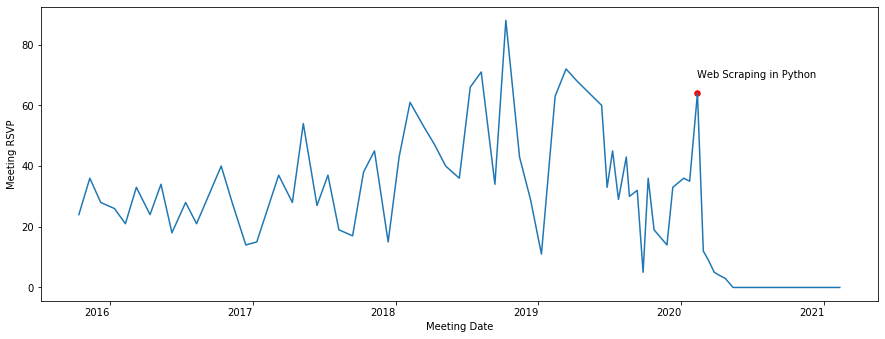

In [6]:
presentation = df.loc[presentation_date]

fig, ax = plt.subplots(figsize=(15, 6))
df['yes_rsvp_count'].plot(ax=ax)
df[df.index == presentation_date].reset_index().plot.scatter(x='local_date', y='yes_rsvp_count', ax=ax, c='r', s=30)

ax.annotate(
    s=presentation['name'],
    xy=(presentation_date, presentation['yes_rsvp_count']),
    xytext=(presentation_date, presentation['yes_rsvp_count'] + 5),
)

ax.set_xlabel("Meeting Date")
ax.set_ylabel("Meeting RSVP")
presentation['yes_rsvp_count']